In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import plotly
import plotly.express as px
import string

In [14]:
data = pd.read_csv('data/tv_shows.csv')
data.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [15]:
data.drop_duplicates(subset='Title', keep='first',inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5368 entries, 0 to 5367
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       5368 non-null   int64 
 1   ID               5368 non-null   int64 
 2   Title            5368 non-null   object
 3   Year             5368 non-null   int64 
 4   Age              3241 non-null   object
 5   IMDb             4406 non-null   object
 6   Rotten Tomatoes  5368 non-null   object
 7   Netflix          5368 non-null   int64 
 8   Hulu             5368 non-null   int64 
 9   Prime Video      5368 non-null   int64 
 10  Disney+          5368 non-null   int64 
 11  Type             5368 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 545.2+ KB


In [20]:
data['IMDb'] = data['IMDb'].fillna('0/10')
data['IMDb'] = data['IMDb'].apply(lambda x: x.rstrip('/10'))
data['IMDb'] = pd.to_numeric(data['IMDb'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5368 entries, 0 to 5367
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5368 non-null   int64  
 1   ID               5368 non-null   int64  
 2   Title            5368 non-null   object 
 3   Year             5368 non-null   int64  
 4   Age              3241 non-null   object 
 5   IMDb             4406 non-null   float64
 6   Rotten Tomatoes  5368 non-null   object 
 7   Netflix          5368 non-null   int64  
 8   Hulu             5368 non-null   int64  
 9   Prime Video      5368 non-null   int64  
 10  Disney+          5368 non-null   int64  
 11  Type             5368 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 545.2+ KB


In [21]:
data['Rotten Tomatoes'] = data['Rotten Tomatoes'].fillna('0/100')
data['Rotten Tomatoes'] = data['Rotten Tomatoes'].apply(lambda x: x.rstrip('/100'))
data['Rotten Tomatoes'] = pd.to_numeric(data['Rotten Tomatoes'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5368 entries, 0 to 5367
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5368 non-null   int64  
 1   ID               5368 non-null   int64  
 2   Title            5368 non-null   object 
 3   Year             5368 non-null   int64  
 4   Age              3241 non-null   object 
 5   IMDb             4406 non-null   float64
 6   Rotten Tomatoes  5062 non-null   float64
 7   Netflix          5368 non-null   int64  
 8   Hulu             5368 non-null   int64  
 9   Prime Video      5368 non-null   int64  
 10  Disney+          5368 non-null   int64  
 11  Type             5368 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 545.2+ KB


In [23]:
data_1 = pd.melt(data[['Title', 'Netflix', 'Hulu', 'Disney+', 'Prime Video']], id_vars=['Title'],
              var_name = 'StreamingOn', value_name='Present')


data_1 = data_1[data_1['Present'] == 1]
data_1.drop(['Present'], axis=1)

,Title,StreamingOn
0,Breaking Bad,Netflix
1,Stranger Things,Netflix
2,Attack on Titan,Netflix
3,Better Call Saul,Netflix
4,Dark,Netflix
...,...,...
21156,Breakfast with Bevan,Prime Video
21157,"Gas, Grub, and Ghosts",Prime Video
21158,Extreme Constructions,Prime Video
21159,Nature's Treasure Islands,Prime Video


In [25]:
data_2 = data_1.merge(data, on='Title', how='inner')
data_2.drop(['Unnamed: 0', 'Netflix', 'Hulu', 'Disney+', 'Prime Video', 'Type'], axis=1, inplace=True)

<AxesSubplot:xlabel='StreamingOn'>

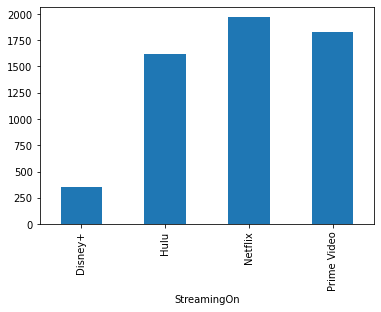

In [26]:
data_ratings = data_2[(data_2.IMDb > 0) & data_2['Rotten Tomatoes'] > 0]
data_2.groupby('StreamingOn').Title.count().plot(kind='bar')

In [31]:
from plotly.subplots import make_subplots

figure = []
figure.append(px.violin(data_ratings, x = 'StreamingOn', y = 'IMDb', color='StreamingOn'))
figure.append(px.violin(data_ratings, x = 'StreamingOn', y = 'Rotten Tomatoes', color='StreamingOn'))
fig = make_subplots(rows=2, cols=4, shared_yaxes=True)

for i in range(2):
    for j in range(4):
        fig.add_trace(figure[i]['data'][j], row=i+1, col=j+1)

fig.update_layout(autosize=False, width=800, height=800)        
fig.show()

In [39]:
#plt.style.use('seaborn-whitegrid')
#plt.figure(figsize=(15,15))
px.scatter_3d(data_ratings, x='IMDb', y='Rotten Tomatoes', z='Year', color='StreamingOn')
#plt.show()